In [ ]:
##### Imports ######
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

matplotlib.use("pgf")
plt.style.use('seaborn-v0_8-poster')
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})
img_folder = "images/"

# 1.4.1 #

In [2]:
df = pd.read_csv(".\clustering-tendency.csv", header =None)
print(df.where(df<0))
print(df.where(df>1))
df.head()

      0   1   2
0   NaN NaN NaN
1   NaN NaN NaN
2   NaN NaN NaN
3   NaN NaN NaN
4   NaN NaN NaN
..   ..  ..  ..
995 NaN NaN NaN
996 NaN NaN NaN
997 NaN NaN NaN
998 NaN NaN NaN
999 NaN NaN NaN

[1000 rows x 3 columns]
      0   1   2
0   NaN NaN NaN
1   NaN NaN NaN
2   NaN NaN NaN
3   NaN NaN NaN
4   NaN NaN NaN
..   ..  ..  ..
995 NaN NaN NaN
996 NaN NaN NaN
997 NaN NaN NaN
998 NaN NaN NaN
999 NaN NaN NaN

[1000 rows x 3 columns]


<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:1: SyntaxWarning: invalid escape sequence '\c'
C:\Users\stefa\AppData\Local\Temp\ipykernel_21832\442444155.py:1: SyntaxWarning: invalid escape sequence '\c'
  df = pd.read_csv(".\clustering-tendency.csv", header =None)


,0,1,2
0,0.964680,0.351274,0.298323
1,0.585918,0.800970,0.187782
2,0.509113,0.280177,0.208792
3,0.352107,0.665974,0.046316
4,0.363669,0.323479,0.219902


# 1.4.2 #

In [3]:
for i in range(0,3):    
    plt.hist(
        df[i],
        bins = 64,
        edgecolor='black',
        histtype='bar'
        )
    plt.title(f'Dimension {i}')
    plt.xlabel(f"Value")
    plt.ylabel(f"Count")
    plt.tight_layout()
    plt.show()
    plt.savefig(f'{img_folder}hist_1dim_{i}.pdf', bbox_inches='tight')
    plt.clf()

C:\Users\stefa\AppData\Local\Temp\ipykernel_21832\2871988308.py:12: UserWarning: FigureCanvasPgf is non-interactive, and thus cannot be shown
  plt.show()


# 1.4.3 #

In [4]:
for i in range(0,3):
    plt.scatter(
        df[i],
        df[(i+1)%3],
    )
    plt.xlabel(f"Component {i}")
    plt.ylabel(f"Component {(i+1)%3}")
    plt.gca().set_aspect('equal')
    plt.tight_layout()
    plt.show()
    plt.savefig(f'{img_folder}scatter_2dim_{i}{(i+1)%3}.pdf', bbox_inches='tight')
    plt.clf()

C:\Users\stefa\AppData\Local\Temp\ipykernel_21832\3678356369.py:10: UserWarning: FigureCanvasPgf is non-interactive, and thus cannot be shown
  plt.show()


# 1.4.4 #

In [ ]:
import math
from itertools import combinations

pairs = list(combinations(range(0,len(df)), 2))
distances = [[0.0 for _ in range(0,len(pairs))] for __ in range(0,6)]
for k in range(0,3):
    for i in range(0,len(pairs)):
    # row_1 = df.iloc[pairs[i][0]]
    # row_2 = df.iloc[pairs[i][1]]
        row_1 = [df[k][pairs[i][0]].tolist()]
        row_2 = [df[k][pairs[i][1]].tolist()]

        dist = math.dist(row_1, row_2)
        distances[k][i] += dist
    print(len(distances[k]))
    for j in range(0,len(pairs)):
        df_1_out = df.drop(k, axis = 1)
        row_1 = df_1_out.iloc[pairs[j][0]]
        row_2 = df_1_out.iloc[pairs[j][1]]

        dist = math.dist(row_1, row_2)
        distances[5-k][j] += dist
    print(len(distances[5-k]))




499500
499500
499500


KeyboardInterrupt: 

In [5]:
from itertools import chain, combinations

def powerset(iterable):
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))

In [8]:
from scipy.spatial.distance import pdist

for feature_set in powerset([0, 1, 2]):
    if len(feature_set) == 0:
        continue

    df_subset = df[list(feature_set)]
    dists = pdist(df_subset, metric='euclidean')

    plt.hist(dists, bins=64, edgecolor="black", histtype="bar")
    plt.title(f"Features: {set(feature_set)}")
    plt.xlabel("Distance")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()
    plt.savefig(f'{img_folder}hist_{len(feature_set)}dim_dist{"".join(map(str, feature_set))}.pdf', bbox_inches='tight')
    plt.clf()

C:\Users\stefa\AppData\Local\Temp\ipykernel_21832\1250827127.py:15: UserWarning: FigureCanvasPgf is non-interactive, and thus cannot be shown
  plt.show()
C:\Users\stefa\AppData\Local\Temp\ipykernel_21832\1250827127.py:15: UserWarning: FigureCanvasPgf is non-interactive, and thus cannot be shown
  plt.show()
C:\Users\stefa\AppData\Local\Temp\ipykernel_21832\1250827127.py:15: UserWarning: FigureCanvasPgf is non-interactive, and thus cannot be shown
  plt.show()
C:\Users\stefa\AppData\Local\Temp\ipykernel_21832\1250827127.py:15: UserWarning: FigureCanvasPgf is non-interactive, and thus cannot be shown
  plt.show()
C:\Users\stefa\AppData\Local\Temp\ipykernel_21832\1250827127.py:15: UserWarning: FigureCanvasPgf is non-interactive, and thus cannot be shown
  plt.show()
C:\Users\stefa\AppData\Local\Temp\ipykernel_21832\1250827127.py:15: UserWarning: FigureCanvasPgf is non-interactive, and thus cannot be shown
  plt.show()
C:\Users\stefa\AppData\Local\Temp\ipykernel_21832\1250827127.py:15: Us

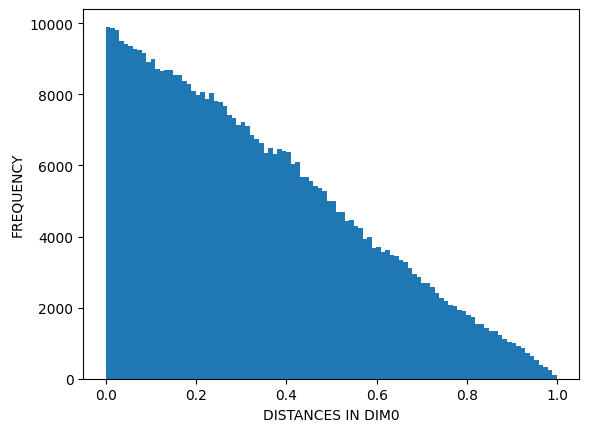

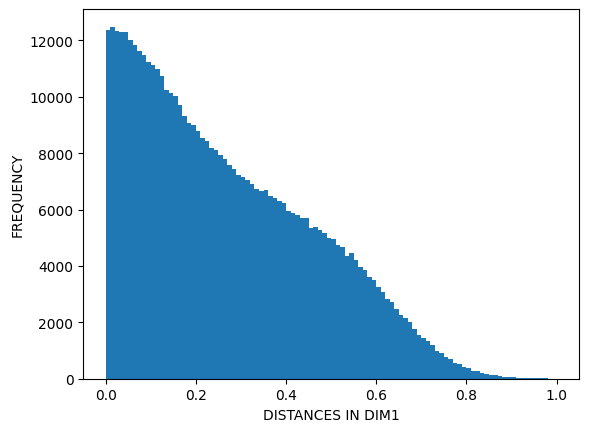

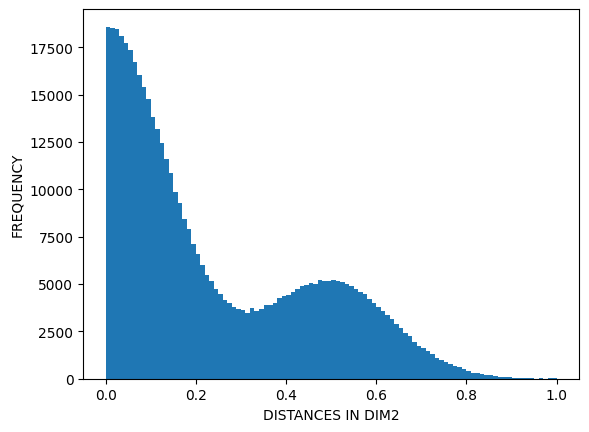

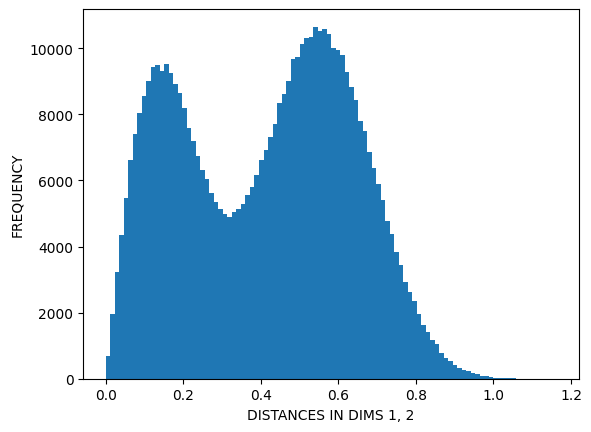

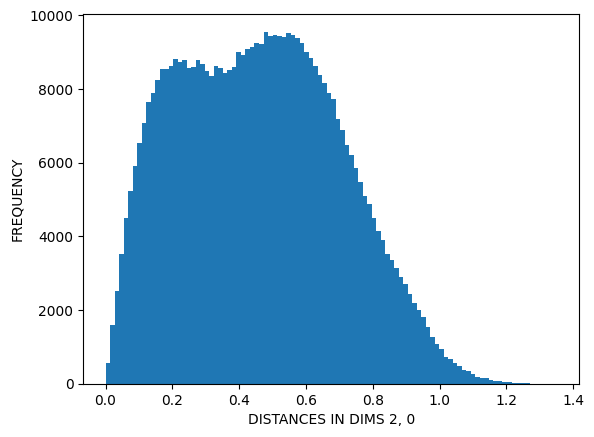

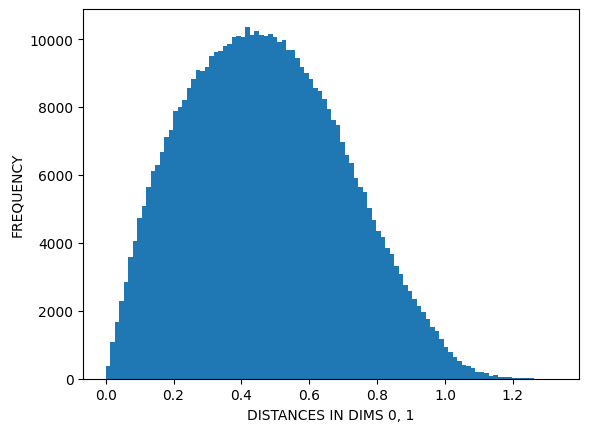

In [ ]:
for i in range(0,3):
    plt.hist(
    distances[i],
    bins = 100,
    )
    plt.xlabel(f"DISTANCES IN DIM{i}")
    plt.ylabel("FREQUENCY")
    plt.show()
for i in range(0,3):
    plt.hist(
    distances[5-i],
    bins = 100,
    )
    plt.xlabel(f"DISTANCES IN DIMS {(i+1)%3}, {(i+2)%3}")
    plt.ylabel("FREQUENCY")
    plt.show()


In [7]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(df[1], df[2], df[0])
ax.set_xlabel('Component 1', labelpad=20)
ax.set_ylabel('Component 2', labelpad=20)
ax.set_zlabel('Component 0', labelpad=20)
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=1.0)
plt.show()
plt.savefig(f'{img_folder}scatter_3dim.pdf', bbox_inches='tight', pad_inches=0.5)
plt.clf()

C:\Users\stefa\AppData\Local\Temp\ipykernel_21832\3665009216.py:9: UserWarning: FigureCanvasPgf is non-interactive, and thus cannot be shown
  plt.show()
